In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
# load the dataset
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive
df = pd.read_csv('/content/drive/My Drive/data/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#df = pd.read_csv('test.csv')
df.sample(5)

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack
3898,5231.5,7.1,64.0,1.864600,1.864600,0,0.0,0.0,0.0,0.4,...,20.595544,93.4,8.109400e-02,5.5,12.851504,29.126497,521.764053,0.9,38.5,0
7069,192476.6,6.0,64.0,1.729922,1.729922,0,0.0,0.0,0.0,0.5,...,15.512334,75.8,1.694705e+08,13.5,12.559655,21.955460,241.741266,1.0,244.6,0
8197,3321.8,17.0,60.0,42123.083720,42123.083720,0,0.0,0.0,0.0,0.0,...,398.573629,90.7,1.694705e+08,13.5,25.281979,564.620045,159928.708000,1.0,244.6,0
1828,7891.2,5.4,57.6,4.089189,4.089189,0,0.0,0.1,0.6,0.0,...,3.870658,57.4,3.776500e-02,5.5,11.016637,5.473937,19.223476,0.8,38.5,1
1540,12400.6,6.0,64.0,2.464544,2.464544,0,0.0,0.0,0.0,0.2,...,5.962434,85.9,8.156860e-02,5.5,11.668216,8.432156,294.449000,0.2,38.5,1


In [32]:
df.dtypes

,0
Header_Length,float64
Protocol Type,float64
Duration,float64
Rate,float64
Srate,float64
Drate,int64
fin_flag_number,float64
syn_flag_number,float64
rst_flag_number,float64
psh_flag_number,float64


In [33]:
df.shape

(8263, 46)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [36]:
normalized_df.sample(5)

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack
7680,0.494802,0.352941,0.250980,0.000013,0.000013,0.0,0.0,0.0,0.0,0.5,...,0.014428,0.021078,4.095108e-13,0.0,0.061047,0.014417,0.000233,0.9,0.0,0.0
5716,0.306421,0.352941,0.250980,0.000016,0.000016,0.0,0.0,0.0,0.0,0.5,...,0.016710,0.020464,3.882681e-13,0.0,0.068011,0.016697,0.000325,0.9,0.0,0.0
4759,0.184194,0.352941,0.250980,0.000019,0.000019,0.0,0.0,0.0,0.0,0.5,...,0.022382,0.020873,9.999991e-01,1.0,0.067406,0.022168,0.000492,1.0,1.0,0.0
7561,0.166168,0.417647,0.233333,0.000266,0.000266,0.0,0.0,0.1,0.2,0.3,...,0.545504,0.334175,9.999998e-01,1.0,0.293783,0.546218,0.330501,1.0,1.0,0.0
1311,0.017314,0.270588,0.125490,0.000012,0.000012,0.0,0.0,0.0,0.0,0.0,...,0.076403,0.084038,9.996456e-01,1.0,0.066320,0.076120,0.015886,1.0,1.0,1.0


In [37]:
normalized_df.shape

(8263, 46)

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
model = keras.Sequential([
    # Hidden Layers
    keras.layers.Dense(64, input_shape=(45,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    #keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    #keras.layers.Dense(2, activation='relu'),

    # Output Layer
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
X = normalized_df.drop('Attack', axis='columns')
y = normalized_df['Attack']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [42]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,625 (21.97 KB)

 Trainable params: 5,625 (21.97 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8853 - loss: 0.4318
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9395 - loss: 0.1353
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9443 - loss: 0.1206
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9331 - loss: 0.1376
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9409 - loss: 0.1201
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9369 - loss: 0.1304
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9458 - loss: 0.1130
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.1201
Epoch 9/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9439 - loss: 0.1137
Epoch 10/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9468 - loss: 0.1099
Epoch 11/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9452 - loss: 0.1098
Epoch 12/100
207/207 ━━━━━━━━━━━━━━━━━━━━

In [44]:
model.evaluate(X_test, y_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9624 - loss: 0.1236


[0.11158183217048645, 0.9618874788284302]

In [45]:
yp = model.predict(X_test)
yp[:5]

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1.0000000e+00],
       [7.6943820e-07],
       [4.0364383e-05],
       [1.0000000e+00],
       [9.9953264e-01]], dtype=float32)

In [46]:
y_test[:5]

,Attack
2576,1.0
6130,0.0
7734,0.0
2430,1.0
1313,1.0


In [47]:
y_pred = []

for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [48]:
y_pred[:5]

[1, 0, 0, 1, 1]

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

#print(classification_report(y_test, y_pred))

# Check for NaNs in y_test and handle them
if np.isnan(y_test).any():
    print("Warning: y_test contains NaN values. Handling them...")
    # Option 1: Remove rows with NaNs (if applicable)
    # y_test_clean = y_test[~np.isnan(y_test)]
    # y_pred_clean = y_pred[~np.isnan(y_test)]  # Adjust y_pred accordingly

    # Option 2: Impute NaNs with a suitable value (e.g., mean, median)
    y_test_clean = np.nan_to_num(y_test, nan=np.nanmedian(y_test))

    print(classification_report(y_test_clean, y_pred))  # Use cleaned data
else:
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       883
         1.0       0.97      0.95      0.96       770

    accuracy                           0.96      1653
   macro avg       0.96      0.96      0.96      1653
weighted avg       0.96      0.96      0.96      1653



Text(95.72222222222221, 0.5, 'Truth')

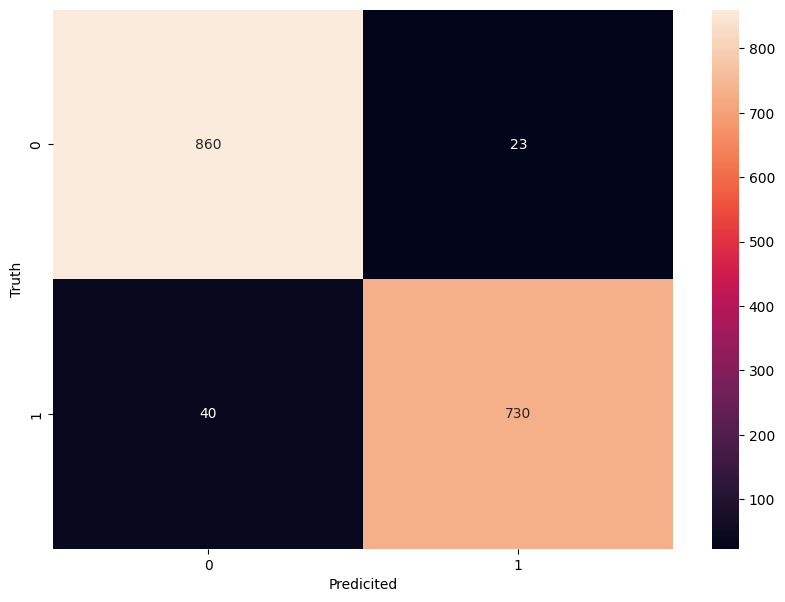

In [51]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicited')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

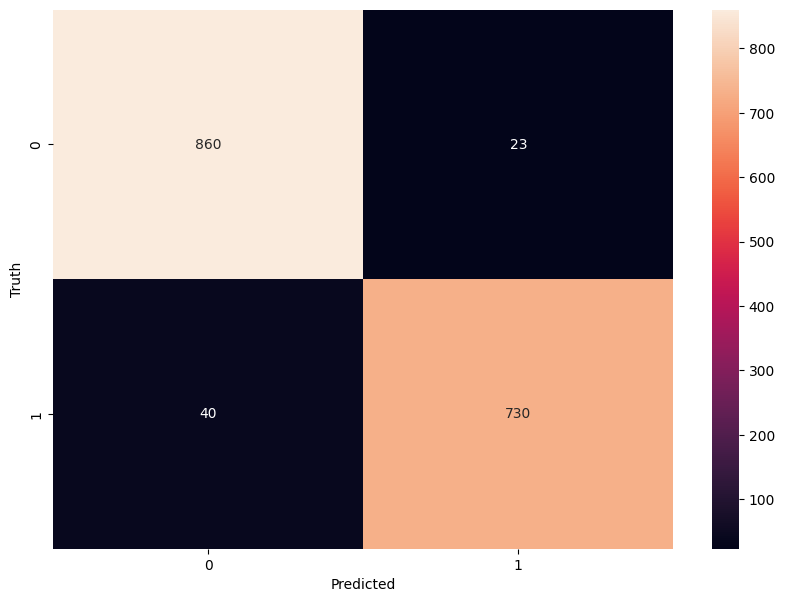

In [52]:
import seaborn as sn
import tensorflow as tf
import numpy as np

# Assuming y_test contains negative values and you want to shift them to be non-negative
y_test_non_negative = y_test - np.min(y_test)

cm = tf.math.confusion_matrix(labels=y_test_non_negative, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
df['Attack'].value_counts()

,count
Attack,
0,4429
1,3834
